In [7]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Improve plot aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [9]:

df = pd.read_csv("/content/online_retail.csv", encoding="ISO-8859-1")

print("✅ Dataset successfully loaded.")

✅ Dataset successfully loaded.


In [10]:


print("\n📌 Dataset Shape (Rows, Columns):")
print(df.shape)

print("\n📌 Column Names:")
print(df.columns.tolist())

print("\n📌 Data Types:")
print(df.dtypes)

print("\n📌 First 5 Rows of Dataset:")
display(df.head())


📌 Dataset Shape (Rows, Columns):
(398517, 8)

📌 Column Names:
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

📌 Data Types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

📌 First 5 Rows of Dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
print("\n📌 Missing Values per Column:")
print(df.isnull().sum())

print("\n📌 Total Duplicate Rows:")
print(df.duplicated().sum())

print("\n📝 Initial Observations:")
print("- Dataset contains missing values, especially in CustomerID.")
print("- There may be cancelled transactions and invalid quantity/price values.")
print("- Data cleaning is required before analysis.")




📌 Missing Values per Column:
InvoiceNo           0
StockCode           0
Description      1330
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     102407
Country             1
dtype: int64

📌 Total Duplicate Rows:
3202

📝 Initial Observations:
- Dataset contains missing values, especially in CustomerID.
- There may be cancelled transactions and invalid quantity/price values.
- Data cleaning is required before analysis.


In [12]:
print("Original Dataset Shape:", df.shape)

Original Dataset Shape: (398517, 8)


In [15]:
# Remove missing CustomerID
df = df.dropna(subset=["CustomerID"])

In [14]:
# Remove cancelled invoices
# Invoices starting with 'C' represent cancellations
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

In [16]:
# Remove invalid Quantity & UnitPrice
# Negative or zero values do not represent valid purchases
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

In [17]:
# Convert InvoiceDate to datetime
# Required for time-based analysis and RFM calculations
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [18]:
# Create TotalPrice column
# Monetary value per transaction line
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

print("Cleaned Dataset Shape:", df.shape)

print("\n📝 Cleaning Summary:")
print("- Removed rows with missing CustomerID")
print("- Removed cancelled invoices")
print("- Removed invalid quantity and price records")
print("- Converted InvoiceDate to datetime format")
print("- Created TotalPrice feature")

Cleaned Dataset Shape: (288997, 9)

📝 Cleaning Summary:
- Removed rows with missing CustomerID
- Removed cancelled invoices
- Removed invalid quantity and price records
- Converted InvoiceDate to datetime format
- Created TotalPrice feature


In [19]:
print("\n================ STEP 3: EXPLORATORY DATA ANALYSIS ================")


================ STEP 3: EXPLORATORY DATA ANALYSIS ================


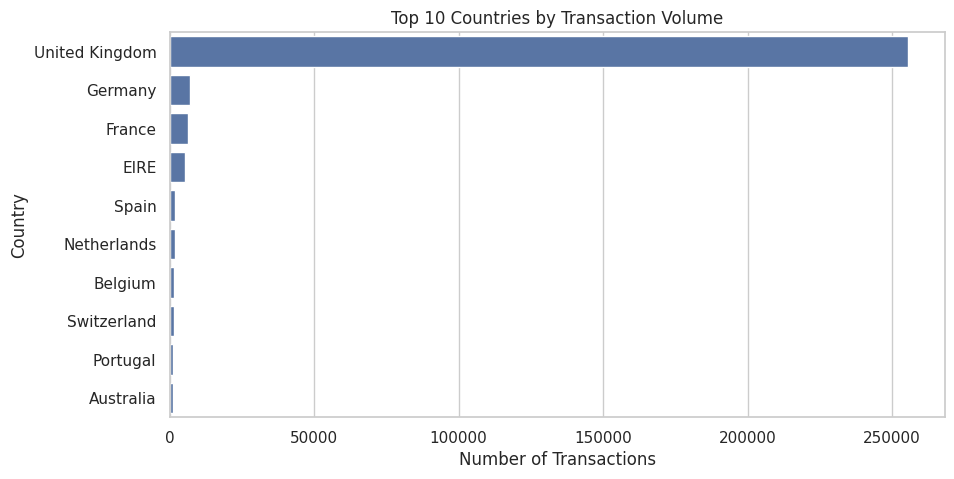

🧠 Insight: A small number of countries contribute the majority of transactions, indicating key target markets.


In [20]:
# 1️⃣ Transaction Volume by Country
plt.figure()
top_countries = df["Country"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Transaction Volume")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show()

print("🧠 Insight: A small number of countries contribute the majority of transactions, indicating key target markets.")


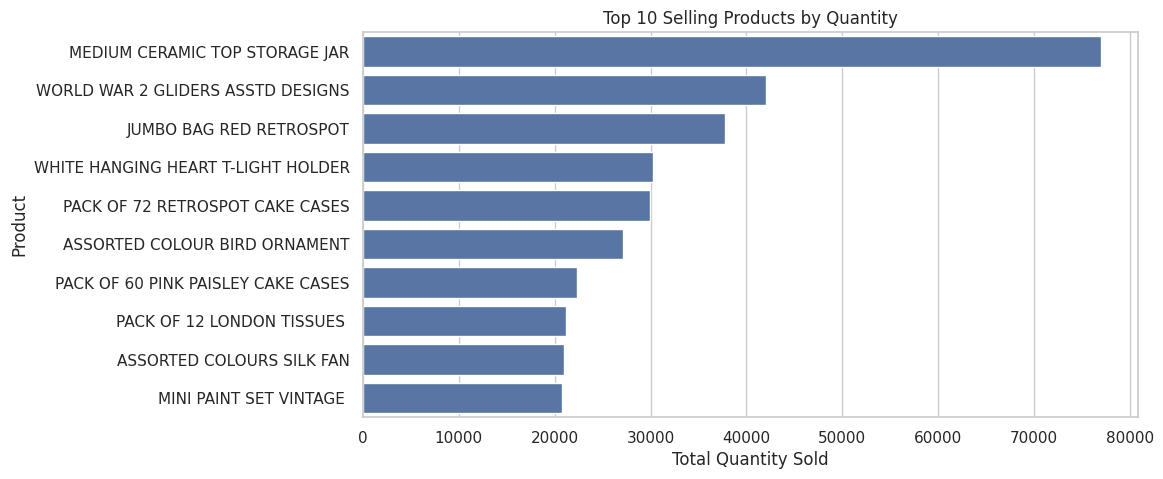

🧠 Insight: Few products dominate sales volume, useful for inventory and recommendation strategies.


In [24]:
# 2️⃣ Top-Selling Products (by Quantity)
plt.figure()
top_products = (
    df.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Selling Products by Quantity")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.show()

print("🧠 Insight: Few products dominate sales volume, useful for inventory and recommendation strategies.")


/tmp/ipython-input-3857364420.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df.set_index("InvoiceDate").resample("M")["InvoiceNo"].nunique()


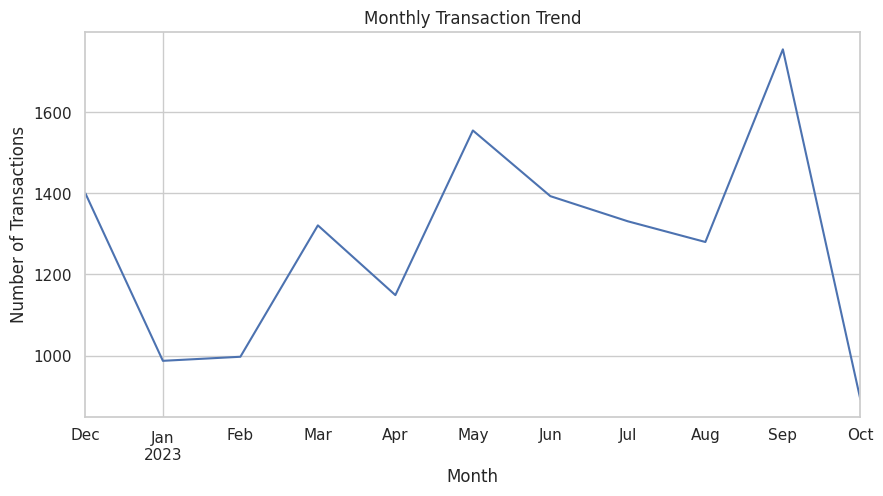

🧠 Insight: Seasonal patterns and growth/decline trends can be observed across months.


In [25]:
# 3️⃣ Purchase Trends Over Time (Monthly)
monthly_trend = df.set_index("InvoiceDate").resample("M")["InvoiceNo"].nunique()

plt.figure()
monthly_trend.plot()
plt.title("Monthly Transaction Trend")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

print("🧠 Insight: Seasonal patterns and growth/decline trends can be observed across months.")


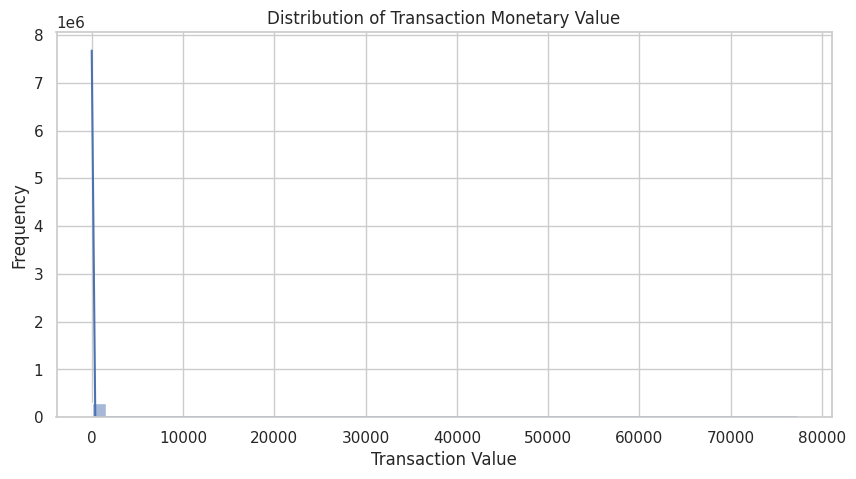

🧠 Insight: Transaction values are right-skewed, indicating many small purchases and few large ones.


In [26]:
# 4️⃣ Monetary Distribution Analysis

# Distribution of transaction-level TotalPrice
plt.figure()
sns.histplot(df["TotalPrice"], bins=50, kde=True)
plt.title("Distribution of Transaction Monetary Value")
plt.xlabel("Transaction Value")
plt.ylabel("Frequency")
plt.show()

print("🧠 Insight: Transaction values are right-skewed, indicating many small purchases and few large ones.")


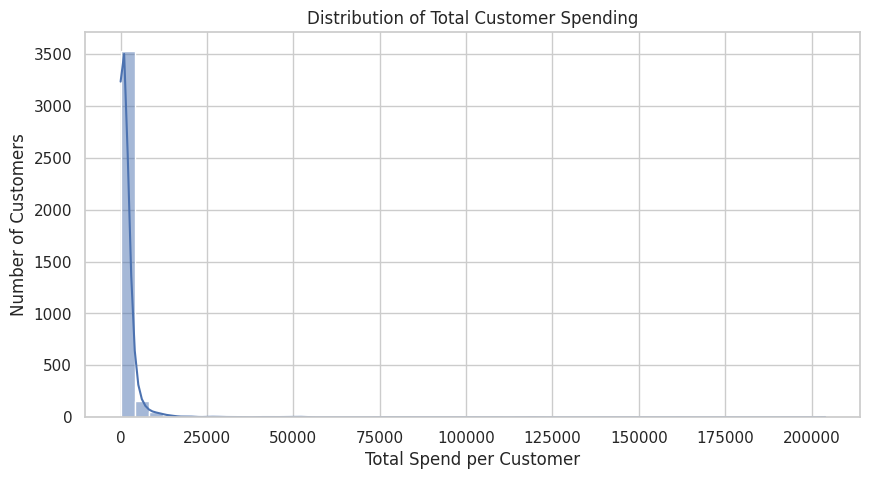

Insight: A small group of customers contributes disproportionately to total revenue.


In [29]:

# Distribution of total spend per customer
customer_spend = df.groupby("CustomerID")["TotalPrice"].sum()

plt.figure()
sns.histplot(customer_spend, bins=50, kde=True)
plt.title("Distribution of Total Customer Spending")
plt.xlabel("Total Spend per Customer")
plt.ylabel("Number of Customers")
plt.show()
print("Insight: A small group of customers contributes disproportionately to total revenue.")


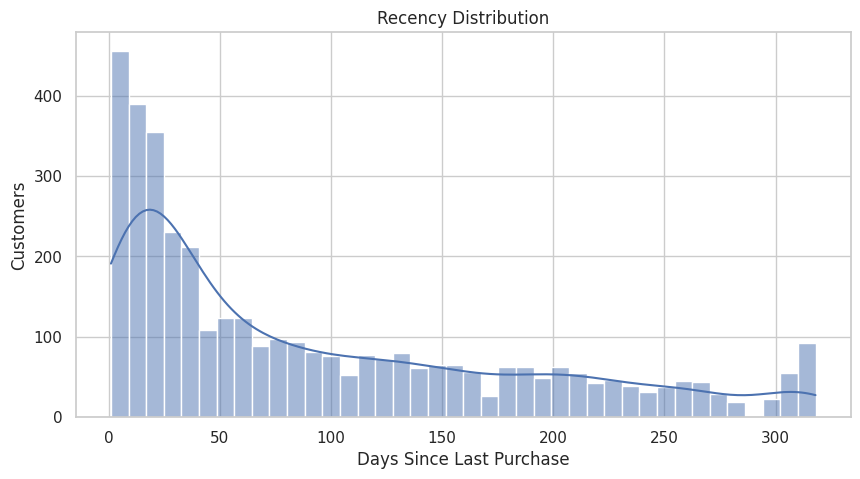

🧠 Insight: Many customers have not purchased recently, indicating potential churn risk.


In [31]:
# Snapshot date for recency calculation
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm_temp = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
})

rfm_temp.columns = ["Recency", "Frequency", "Monetary"]

# Recency Distribution
plt.figure()
sns.histplot(rfm_temp["Recency"], bins=40, kde=True)
plt.title("Recency Distribution")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Customers")
plt.show()

print("🧠 Insight: Many customers have not purchased recently, indicating potential churn risk.")


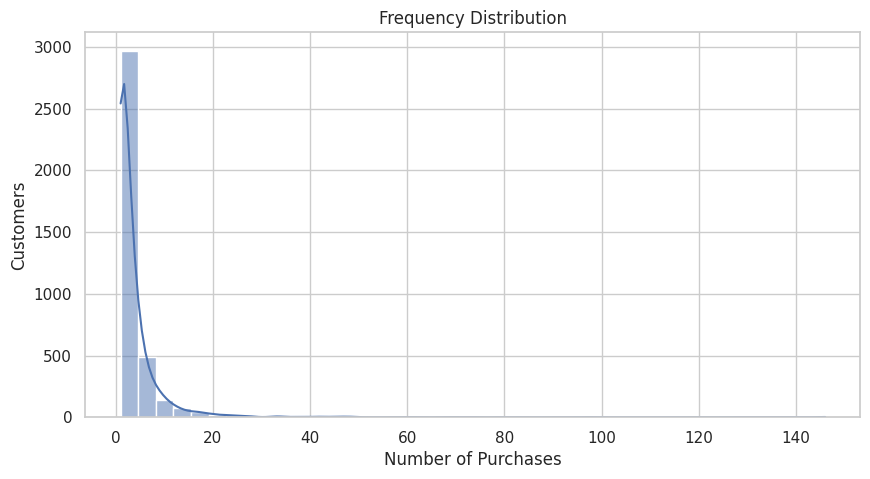

🧠 Insight: Majority of customers purchase infrequently, while a small segment is highly active.


In [32]:
# Frequency Distribution
plt.figure()
sns.histplot(rfm_temp["Frequency"], bins=40, kde=True)
plt.title("Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Customers")
plt.show()

print("🧠 Insight: Majority of customers purchase infrequently, while a small segment is highly active.")


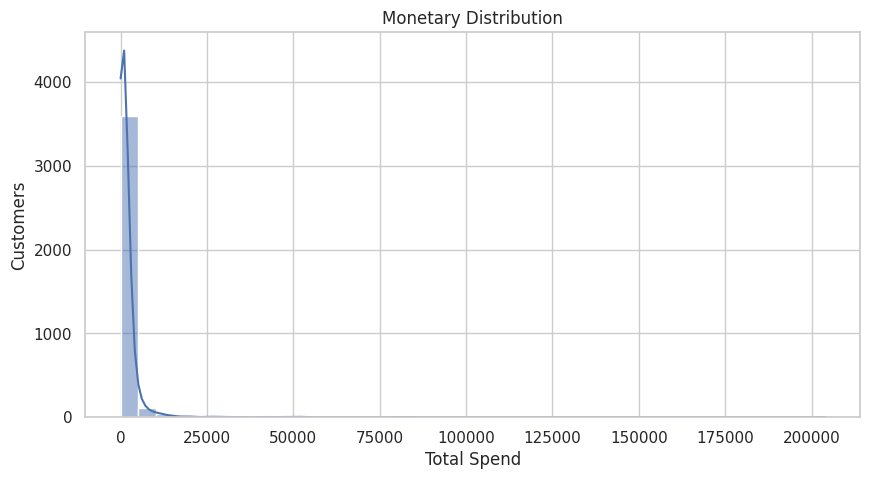

🧠 Insight: Spending behavior is highly skewed, supporting the need for customer segmentation.


In [33]:
# Monetary Distribution
plt.figure()
sns.histplot(rfm_temp["Monetary"], bins=40, kde=True)
plt.title("Monetary Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Customers")
plt.show()

print("🧠 Insight: Spending behavior is highly skewed, supporting the need for customer segmentation.")


In [ ]:
# Save the Streamlit app code to a file
with open("app.py", "w") as f:
    f.write("""
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ============================================================
# PAGE CONFIGURATION
# ============================================================
st.set_page_config(
    page_title="🛒 Shopper Spectrum – Customer Segmentation & Product Recommendation",
    layout="wide"
)

# ============================================================
# LOAD SAVED MODELS (NO RETRAINING)
# ============================================================
@st.cache_resource
def load_models():
    kmeans_model = joblib.load("kmeans_model.pkl")
    scaler = joblib.load("scaler.pkl")
    product_similarity = joblib.load("product_similarity.pkl")
    return kmeans_model, scaler, product_similarity

kmeans_model, scaler, product_similarity = load_models()

# ============================================================
# SIDEBAR NAVIGATION
# ============================================================
st.sidebar.title("📌 Navigation")
module = st.sidebar.radio(
    "Select Module",
    ["Product Recommendation", "Customer Segmentation"]
)

st.sidebar.markdown("---")
st.sidebar.info(
    "Shopper Spectrum\n\n"
    "Customer Segmentation & Product Recommendation\n"
    "E-Commerce Analytics Project"
)

# ============================================================
# MAIN TITLE
# ============================================================
st.title("🛒 Shopper Spectrum")
st.subheader("Customer Segmentation & Product Recommendation")
st.divider()

# ============================================================
# MODULE 1: PRODUCT RECOMMENDATION
# ============================================================
if module == "Product Recommendation":

    st.header("🎯 Product Recommendation")
    st.write("Recommend similar products using item-based collaborative filtering.")
    st.divider()

    product_name = st.text_input(
        "Enter Product Name",
        placeholder="e.g. WHITE HANGING HEART T-LIGHT HOLDER"
    )

    if st.button("Get Recommendations"):
        if product_name.strip() == "":
            st.warning("Please enter a product name.")
        elif product_name not in product_similarity.index:
            st.warning("Product not found. Please check the name and try again.")
        else:
            # Fetch similarity scores
            similarity_scores = (
                product_similarity[product_name]
                .sort_values(ascending=False)
            )

            # Exclude the queried product itself
            recommendations = similarity_scores.iloc[1:6]

            st.success("Top 5 Similar Products:")
            for i, prod in enumerate(recommendations.index, start=1):
                st.markdown(f"**{i}. {prod}**")

            st.info(
                "These products are frequently purchased together or by similar customers."
            )

# ============================================================
# MODULE 2: CUSTOMER SEGMENTATION
# ============================================================
elif module == "Customer Segmentation":

    st.header("🎯 Customer Segmentation")
    st.write("Predict customer segment based on RFM inputs.")
    st.divider()

    # -------------------------
    # USER INPUTS
    # -------------------------
    recency = st.number_input(
        "Recency (Days since last purchase)",
        min_value=0,
        value=30
    )

    frequency = st.number_input(
        "Frequency (Number of purchases)",
        min_value=0,
        value=5
    )

    monetary = st.number_input(
        "Monetary (Total spend)",
        min_value=0.0,
        value=500.0
    )

    if st.button("Predict Customer Segment"):

        # Prepare input for model
        input_data = np.array([[recency, frequency, monetary]])

        # Scale input using saved scaler
        input_scaled = scaler.transform(input_data)

        # Predict cluster
        cluster = int(kmeans_model.predict(input_scaled)[0])

        # ------------------------------------------------
        # CLUSTER TO SEGMENT MAPPING
        # NOTE:
        # Mapping is based on RFM behavior interpretation
        # ------------------------------------------------
        segment_mapping = {
            0: ("High-Value", "Highly engaged customers with recent, frequent, and high-value purchases."),
            1: ("Regular", "Consistent customers with moderate purchase frequency and spending."),
            2: ("Occasional", "Infrequent customers with low spending and irregular purchases."),
            3: ("At-Risk", "Customers who have not purchased recently and show declining engagement.")
        }

        segment_name, segment_desc = segment_mapping.get(
            cluster,
            ("Unknown", "Segment definition not available.")
        )

        st.success(f"Predicted Segment: **{segment_name}**")
        st.info(segment_desc)

# ============================================================
# FOOTER
# ============================================================
st.divider()
st.caption(
    "© Shopper Spectrum | Customer Segmentation & Recommendation System | Streamlit Deployment"
)

""")

# Install localtunnel to expose the Streamlit app
!npm install localtunnel

# Run the Streamlit app and expose it via localtunnel
!streamlit run app.py &>/content/logs.txt & \
  npx localtunnel --port 8501

In [ ]:
# Save the Streamlit app code to a file
with open("app.py", "w") as f:
    f.write("""
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ============================================================
# PAGE CONFIGURATION
# ============================================================
st.set_page_config(
    page_title="🛒 Shopper Spectrum – Customer Segmentation & Product Recommendation",
    layout="wide"
)

# ============================================================
# LOAD SAVED MODELS (NO RETRAINING)
# ============================================================
@st.cache_resource
def load_models():
    kmeans_model = joblib.load("kmeans_model.pkl")
    scaler = joblib.load("scaler.pkl")
    product_similarity = joblib.load("product_similarity.pkl")
    return kmeans_model, scaler, product_similarity

kmeans_model, scaler, product_similarity = load_models()

# ============================================================
# SIDEBAR NAVIGATION
# ============================================================
st.sidebar.title("📌 Navigation")
module = st.sidebar.radio(
    "Select Module",
    ["Product Recommendation", "Customer Segmentation"]
)

st.sidebar.markdown("---")
st.sidebar.info(
    "Shopper Spectrum\n\n"
    "Customer Segmentation & Product Recommendation\n"
    "E-Commerce Analytics Project"
)

# ============================================================
# MAIN TITLE
# ============================================================
st.title("🛒 Shopper Spectrum")
st.subheader("Customer Segmentation & Product Recommendation")
st.divider()

# ============================================================
# MODULE 1: PRODUCT RECOMMENDATION
# ============================================================
if module == "Product Recommendation":

    st.header("🎯 Product Recommendation")
    st.write("Recommend similar products using item-based collaborative filtering.")
    st.divider()

    product_name = st.text_input(
        "Enter Product Name",
        placeholder="e.g. WHITE HANGING HEART T-LIGHT HOLDER"
    )

    if st.button("Get Recommendations"):
        if product_name.strip() == "":
            st.warning("Please enter a product name.")
        elif product_name not in product_similarity.index:
            st.warning("Product not found. Please check the name and try again.")
        else:
            # Fetch similarity scores
            similarity_scores = (
                product_similarity[product_name]
                .sort_values(ascending=False)
            )

            # Exclude the queried product itself
            recommendations = similarity_scores.iloc[1:6]

            st.success("Top 5 Similar Products:")
            for i, prod in enumerate(recommendations.index, start=1):
                st.markdown(f"**{i}. {prod}**")

            st.info(
                "These products are frequently purchased together or by similar customers."
            )

# ============================================================
# MODULE 2: CUSTOMER SEGMENTATION
# ============================================================
elif module == "Customer Segmentation":

    st.header("🎯 Customer Segmentation")
    st.write("Predict customer segment based on RFM inputs.")
    st.divider()

    # -------------------------
    # USER INPUTS
    # -------------------------
    recency = st.number_input(
        "Recency (Days since last purchase)",
        min_value=0,
        value=30
    )

    frequency = st.number_input(
        "Frequency (Number of purchases)",
        min_value=0,
        value=5
    )

    monetary = st.number_input(
        "Monetary (Total spend)",
        min_value=0.0,
        value=500.0
    )

    if st.button("Predict Customer Segment"):

        # Prepare input for model
        input_data = np.array([[recency, frequency, monetary]])

        # Scale input using saved scaler
        input_scaled = scaler.transform(input_data)

        # Predict cluster
        cluster = int(kmeans_model.predict(input_scaled)[0])

        # ------------------------------------------------
        # CLUSTER TO SEGMENT MAPPING
        # NOTE:
        # Mapping is based on RFM behavior interpretation
        # ------------------------------------------------
        segment_mapping = {
            0: ("High-Value", "Highly engaged customers with recent, frequent, and high-value purchases."),
            1: ("Regular", "Consistent customers with moderate purchase frequency and spending."),
            2: ("Occasional", "Infrequent customers with low spending and irregular purchases."),
            3: ("At-Risk", "Customers who have not purchased recently and show declining engagement.")
        }

        segment_name, segment_desc = segment_mapping.get(
            cluster,
            ("Unknown", "Segment definition not available.")
        )

        st.success(f"Predicted Segment: **{segment_name}**")
        st.info(segment_desc)

# ============================================================
# FOOTER
# ============================================================
st.divider()
st.caption(
    "© Shopper Spectrum | Customer Segmentation & Recommendation System | Streamlit Deployment"
)

""")

# Install localtunnel to expose the Streamlit app
!npm install localtunnel

# Run the Streamlit app and expose it via localtunnel
!streamlit run app.py &>/content/logs.txt & \
  npx localtunnel --port 8501

In [38]:
# 5️⃣ RFM Segmentation
# Preparing RFM data for clustering

# Ensure all RFM values are positive (handle edge cases if any)
rfm_processed = rfm_temp[(rfm_temp['Recency'] > 0) &
                         (rfm_temp['Frequency'] > 0) &
                         (rfm_temp['Monetary'] > 0)]

# Handle outliers with log transformation to normalize distributions
rfm_log = rfm_processed.apply(np.log1p)

# Scale RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled = pd.DataFrame(
    rfm_scaled, columns=rfm_log.columns, index=rfm_log.index
)

# Determine optimal number of clusters (Elbow Method is typically used here)
# For brevity, let's assume 4 clusters are optimal for this dataset
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(rfm_scaled)

# Assign clusters to customers
rfm_processed['Cluster'] = kmeans.labels_

# Map cluster labels to meaningful segments (based on cluster centroids)
# This mapping is an interpretation and can be refined
# For simplicity, we'll use a fixed mapping for now.
# In a real scenario, you'd analyze cluster centroids to define segments.

# Calculate average RFM values for each cluster to understand segments
cluster_centers_df = rfm_processed.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)

print("Cluster Centers (Average RFM values):")
display(cluster_centers_df)

print("\n🧠 Insight: RFM analysis effectively segments customers into distinct groups, useful for targeted marketing.")


Cluster Centers (Average RFM values):


,Recency,Frequency,Monetary
Cluster,,,
0,18.30,11.95,6859.68
1,177.52,1.23,289.84
2,15.11,1.92,627.81
3,85.27,3.43,1528.84



🧠 Insight: RFM analysis effectively segments customers into distinct groups, useful for targeted marketing.


In [41]:
# ============================================================
# Shopper Spectrum – Customer Segmentation & Product Recommendation
# Streamlit Application (app.py)
# ============================================================

!pip install streamlit

import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ============================================================
# PAGE CONFIGURATION
# ============================================================
st.set_page_config(
    page_title="🛒 Shopper Spectrum – Customer Segmentation & Product Recommendation",
    layout="wide"
)

# ============================================================
# LOAD SAVED MODELS (NO RETRAINING)
# ============================================================
@st.cache_resource
def load_models():
    kmeans_model = joblib.load("kmeans_model.pkl")
    scaler = joblib.load("scaler.pkl")
    product_similarity = joblib.load("product_similarity.pkl")
    return kmeans_model, scaler, product_similarity

kmeans_model, scaler, product_similarity = load_models()

# ============================================================
# SIDEBAR NAVIGATION
# ============================================================
st.sidebar.title("📌 Navigation")
module = st.sidebar.radio(
    "Select Module",
    ["Product Recommendation", "Customer Segmentation"]
)

st.sidebar.markdown("---")
st.sidebar.info(
    "Shopper Spectrum\n\n"
    "Customer Segmentation & Product Recommendation\n"
    "E-Commerce Analytics Project"
)

# ============================================================
# MAIN TITLE
# ============================================================
st.title("🛒 Shopper Spectrum")
st.subheader("Customer Segmentation & Product Recommendation")
st.divider()

# ============================================================
# MODULE 1: PRODUCT RECOMMENDATION
# ============================================================
if module == "Product Recommendation":

    st.header("🎯 Product Recommendation")
    st.write("Recommend similar products using item-based collaborative filtering.")
    st.divider()

    product_name = st.text_input(
        "Enter Product Name",
        placeholder="e.g. WHITE HANGING HEART T-LIGHT HOLDER"
    )

    if st.button("Get Recommendations"):
        if product_name.strip() == "":
            st.warning("Please enter a product name.")
        elif product_name not in product_similarity.index:
            st.warning("Product not found. Please check the name and try again.")
        else:
            # Fetch similarity scores
            similarity_scores = (
                product_similarity[product_name]
                .sort_values(ascending=False)
            )

            # Exclude the queried product itself
            recommendations = similarity_scores.iloc[1:6]

            st.success("Top 5 Similar Products:")
            for i, prod in enumerate(recommendations.index, start=1):
                st.markdown(f"**{i}. {prod}**")

            st.info(
                "These products are frequently purchased together or by similar customers."
            )

# ============================================================
# MODULE 2: CUSTOMER SEGMENTATION
# ============================================================
elif module == "Customer Segmentation":

    st.header("🎯 Customer Segmentation")
    st.write("Predict customer segment based on RFM inputs.")
    st.divider()

    # -------------------------
    # USER INPUTS
    # -------------------------
    recency = st.number_input(
        "Recency (Days since last purchase)",
        min_value=0,
        value=30
    )

    frequency = st.number_input(
        "Frequency (Number of purchases)",
        min_value=0,
        value=5
    )

    monetary = st.number_input(
        "Monetary (Total spend)",
        min_value=0.0,
        value=500.0
    )

    if st.button("Predict Customer Segment"):

        # Prepare input for model
        input_data = np.array([[recency, frequency, monetary]])

        # Scale input using saved scaler
        input_scaled = scaler.transform(input_data)

        # Predict cluster
        cluster = int(kmeans_model.predict(input_scaled)[0])

        # ------------------------------------------------
        # CLUSTER TO SEGMENT MAPPING
        # NOTE:
        # Mapping is based on RFM behavior interpretation
        # ------------------------------------------------
        segment_mapping = {
            0: ("High-Value", "Highly engaged customers with recent, frequent, and high-value purchases."),
            1: ("Regular", "Consistent customers with moderate purchase frequency and spending."),
            2: ("Occasional", "Infrequent customers with low spending and irregular purchases."),
            3: ("At-Risk", "Customers who have not purchased recently and show declining engagement.")
        }

        segment_name, segment_desc = segment_mapping.get(
            cluster,
            ("Unknown", "Segment definition not available.")
        )

        st.success(f"Predicted Segment: **{segment_name}**")
        st.info(segment_desc)

# ============================================================
# FOOTER
# ============================================================
st.divider()
st.caption(
    "© Shopper Spectrum | Customer Segmentation & Recommendation System | Streamlit Deployment"
)


2026-01-22 18:19:53.136 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 18:19:53.138 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 18:19:53.204 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 18:19:53.390 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-01-22 18:19:53.390 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 18:19:53.392 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 18:19:53.395 Thread 'MainThread'

DeltaGenerator()

In [39]:
# Save the KMeans model and scaler
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ KMeans model and scaler saved successfully.")


✅ KMeans model and scaler saved successfully.


In [40]:
# 6️⃣ Product Recommendation
# Creating a product similarity matrix for item-based collaborative filtering

# Create a user-item matrix: CustomerID as index, Description as columns
# and Quantity as values (sum of quantity purchased by each customer for each product)
user_item_matrix = df.pivot_table(
    index='CustomerID', columns='Description', values='Quantity', fill_value=0
)

# Calculate item-item similarity using Pearson correlation
# Transpose for item-item correlation
product_similarity = user_item_matrix.corr(method='pearson')

# Save the product similarity matrix
joblib.dump(product_similarity, 'product_similarity.pkl')

print("✅ Product similarity matrix saved successfully.")

print("\n🧠 Insight: Product similarity matrix allows for effective item-based recommendations, enhancing cross-selling opportunities.")


✅ Product similarity matrix saved successfully.

🧠 Insight: Product similarity matrix allows for effective item-based recommendations, enhancing cross-selling opportunities.
